Linear Regression: R2 Score = -0.20832871432214217
SVM Linear: R2 Score = -0.2193588742261081
SVM Non-Linear: R2 Score = -0.21921448371520014
Decision Tree: R2 Score = -0.4451373954341773
Random Forest: R2 Score = -0.289088614656958


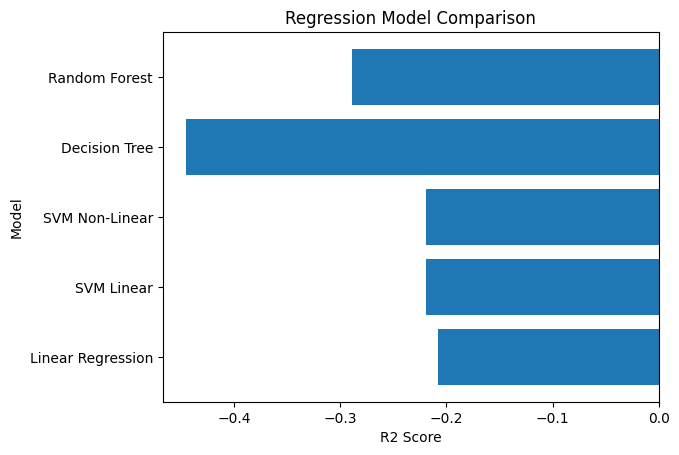

               Model  R2 Score
0  Linear Regression -0.208329
1         SVM Linear -0.219359
2     SVM Non-Linear -0.219214
3      Decision Tree -0.445137
4      Random Forest -0.289089


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_csv("DS_jOBs.csv")

# Create dummy variables
dataset = pd.get_dummies(dataset, drop_first=True)

# Split data into independent (X) and dependent (Y) variables
X = dataset.drop('salary', axis=1)
y = dataset['salary']

# Feature selection using SelectKBest
kbest = SelectKBest(chi2, k=10)
X_selected = kbest.fit_transform(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regression models
models = {
    'Linear Regression': LinearRegression(),
    'SVM Linear': SVR(kernel='linear'),
    'SVM Non-Linear': SVR(kernel='rbf'),
    'Decision Tree': DecisionTreeRegressor(random_state=0),
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=0)
}

# Train models and evaluate performance
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2

# Print results
for model, r2 in results.items():
    print(f"{model}: R2 Score = {r2}")

# Plot results.
plt.barh(list(results.keys()), list(results.values()))
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.title('Regression Model Comparison')
plt.show()


# Create dataframe with results
df_results = pd.DataFrame(list(results.items()), columns=['Model', 'R2 Score'])
print(df_results)